In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../_data/hitelbiralat_prepared.csv')

In [3]:
target_variable='Good_for_loan'
input_variables=['Age','MONTHS_IN_RESIDENCE','PERSONAL_NET_INCOME',
            'MATE_INCOME', 'Sex_F', 
           'Marital_Status_C', 'Marital_Status_D', 'Marital_Status_O',
           'Marital_Status_S', 'RESIDENCE_TYPE_A',
           'RESIDENCE_TYPE_C', 'RESIDENCE_TYPE_O']

In [4]:
df.head(2)

,Age,MONTHS_IN_RESIDENCE,PERSONAL_NET_INCOME,MATE_INCOME,Good_for_loan,Sex_F,Sex_M,Marital_Status_C,Marital_Status_D,Marital_Status_O,Marital_Status_S,Marital_Status_V,RESIDENCE_TYPE_A,RESIDENCE_TYPE_C,RESIDENCE_TYPE_O,RESIDENCE_TYPE_P
0,60,300,0.0,2663.0,1,1,0,1,0,0,0,0,0,0,0,1
1,19,60,180.0,0.0,1,0,1,0,0,0,1,0,0,1,0,0


In [5]:
df.shape

(40000, 16)

In [6]:
# df exploration
# X, y, train - test
# dct max depth accuracy dependency
# rf auc score optimization - grid search
# rf auc score optimization - random search
# profit curve

In [7]:
df_test = df.sample(frac=0.1, random_state=1)

df = df.drop(df_test.index, axis=0)

df_test = df_test.reset_index(drop=True)
df = df.reset_index(drop=True)

In [8]:
df.shape

(36000, 16)

In [9]:
df_test.shape

(4000, 16)

In [10]:
# X, y, X_train, X_test, y_train, y_test

In [11]:
X = df.loc[:, input_variables]
y = df.loc[:, target_variable]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# dct

In [14]:
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [16]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [17]:
accuracy_score(y_train, pred_train)

0.7995238095238095

In [18]:
accuracy_score(y_test, pred_test)

0.8116666666666666

In [19]:
train_score_list = []
test_score_list = []
for i in tqdm.tqdm(range(1, 31)):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    model.fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 19.70it/s]


Text(0, 0.5, 'accuracy')

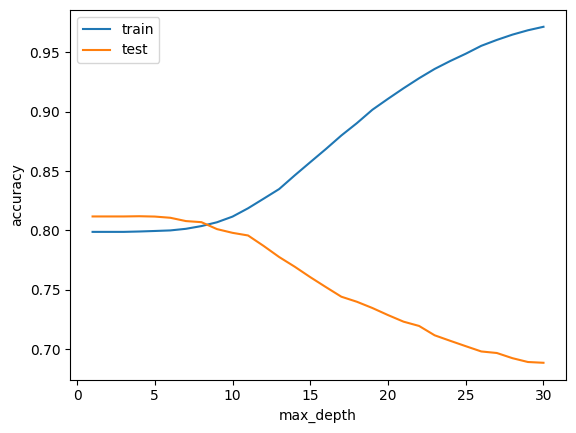

In [20]:
plt.plot(range(1, 31), train_score_list, label='train')
plt.plot(range(1, 31), test_score_list, label='test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [21]:
# rf

In [22]:
model = RandomForestClassifier(random_state=1)

In [23]:
pred = cross_val_predict(model, X, y, cv=4, method='predict_proba')

In [24]:
df['pred_default'] = pred[:, 1]

In [25]:
roc_auc_score(y, pred[:, 1])

0.5633551169525006

In [26]:
# gridsearch

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = [
    {
        'n_estimators': [1, 2, 10, 100, 200, 300],
        'max_depth': [1, 3, 5, 12, 20]
    }
]

In [29]:
cv = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=2, verbose=100)

In [30]:
cv.fit(X, y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV 1/2; 1/30] START max_depth=1, n_estimators=1................................
[CV 1/2; 1/30] END .max_depth=1, n_estimators=1;, score=0.514 total time=   0.0s
[CV 2/2; 1/30] START max_depth=1, n_estimators=1................................
[CV 2/2; 1/30] END .max_depth=1, n_estimators=1;, score=0.535 total time=   0.0s
[CV 1/2; 2/30] START max_depth=1, n_estimators=2................................
[CV 1/2; 2/30] END .max_depth=1, n_estimators=2;, score=0.573 total time=   0.0s
[CV 2/2; 2/30] START max_depth=1, n_estimators=2................................
[CV 2/2; 2/30] END .max_depth=1, n_estimators=2;, score=0.581 total time=   0.0s
[CV 1/2; 3/30] START max_depth=1, n_estimators=10...............................
[CV 1/2; 3/30] END max_depth=1, n_estimators=10;, score=0.615 total time=   0.0s
[CV 2/2; 3/30] START max_depth=1, n_estimators=10...............................
[CV 2/2; 3/30] END max_depth=1, n_estimators=10;

[CV 1/2; 27/30] END max_depth=20, n_estimators=10;, score=0.570 total time=   0.1s
[CV 2/2; 27/30] START max_depth=20, n_estimators=10.............................
[CV 2/2; 27/30] END max_depth=20, n_estimators=10;, score=0.575 total time=   0.1s
[CV 1/2; 28/30] START max_depth=20, n_estimators=100............................
[CV 1/2; 28/30] END max_depth=20, n_estimators=100;, score=0.590 total time=   1.4s
[CV 2/2; 28/30] START max_depth=20, n_estimators=100............................
[CV 2/2; 28/30] END max_depth=20, n_estimators=100;, score=0.590 total time=   1.8s
[CV 1/2; 29/30] START max_depth=20, n_estimators=200............................
[CV 1/2; 29/30] END max_depth=20, n_estimators=200;, score=0.591 total time=   4.2s
[CV 2/2; 29/30] START max_depth=20, n_estimators=200............................
[CV 2/2; 29/30] END max_depth=20, n_estimators=200;, score=0.592 total time=   3.3s
[CV 1/2; 30/30] START max_depth=20, n_estimators=300............................
[CV 1/2; 30/

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [1, 3, 5, 12, 20],
                          'n_estimators': [1, 2, 10, 100, 200, 300]}],
             scoring='roc_auc', verbose=100)

In [31]:
cv.best_score_

0.6416032090541538

In [32]:
cv.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [33]:
cv_df = pd.DataFrame(cv.cv_results_)

<Axes: xlabel='param_max_depth'>

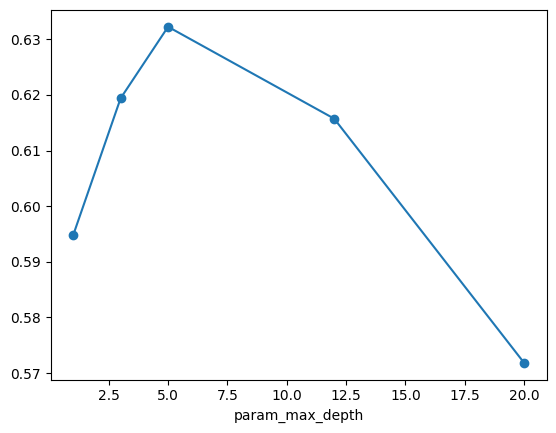

In [34]:
cv_df.groupby('param_max_depth')['mean_test_score'].mean().plot(marker='o')

<Axes: xlabel='param_n_estimators'>

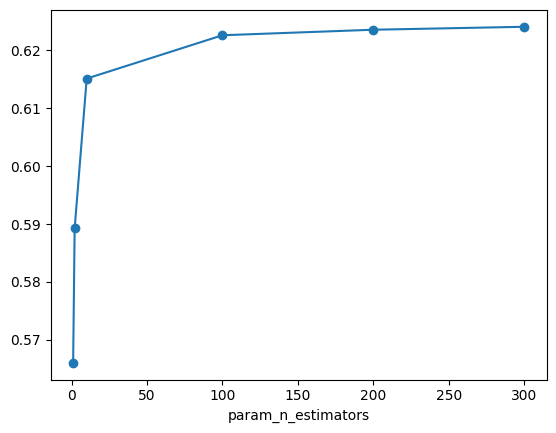

In [35]:
cv_df.groupby('param_n_estimators')['mean_test_score'].mean().plot(marker='o')

In [36]:
# random search

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
param_dist = [
    {
        'n_estimators': np.arange(10, 1000, step=50),
        'max_depth': np.arange(1, 16, step=1)
    }
]

In [39]:
param_dist

[{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
         660, 710, 760, 810, 860, 910, 960]),
  'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}]

In [40]:
# cv = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=2, verbose=100
rcv = RandomizedSearchCV(model, param_distributions=param_dist,
                        scoring='roc_auc', cv=2, verbose=1,
                        n_iter=30, random_state=1)

In [41]:
rcv.fit(X, y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
                   n_iter=30,
                   param_distributions=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])}],
                   random_state=1, scoring='roc_auc', verbose=1)

In [42]:
rcv.best_score_

0.6437978124251743

In [43]:
rcv.best_params_

{'n_estimators': 360, 'max_depth': 8}

In [44]:
rcv_df = pd.DataFrame(rcv.cv_results_)

<Axes: xlabel='param_max_depth'>

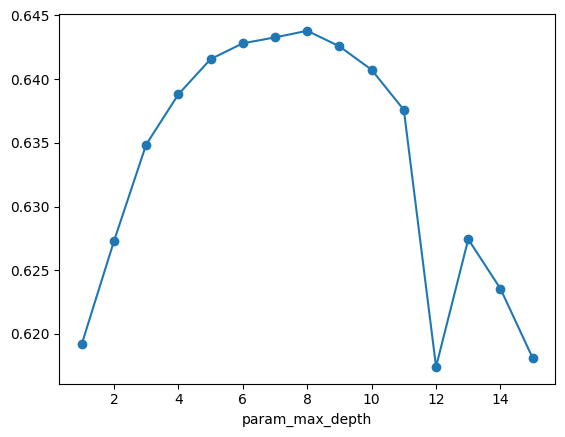

In [45]:
rcv_df.groupby('param_max_depth')['mean_test_score'].mean().plot(marker='o')

<Axes: xlabel='param_n_estimators'>

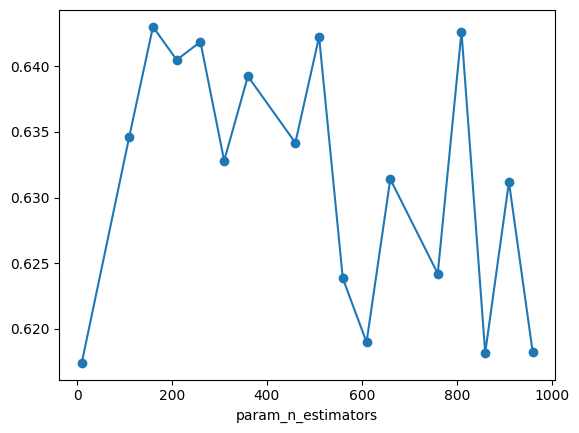

In [46]:
rcv_df.groupby('param_n_estimators')['mean_test_score'].mean().plot(marker='o')

Text(0.5, 0, 'max_depth')

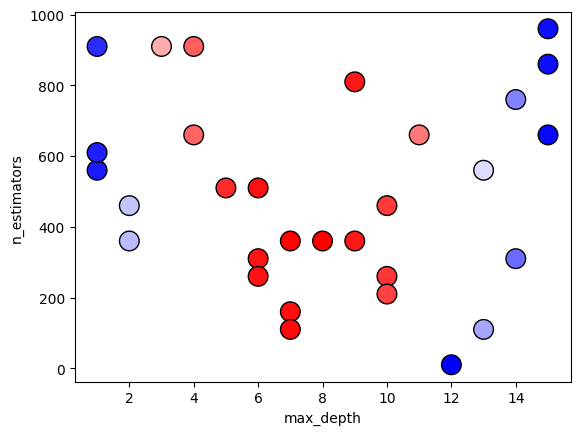

In [47]:
plt.scatter(rcv_df['param_max_depth'], rcv_df['param_n_estimators'],
            c=rcv_df['mean_test_score'], cmap='bwr', edgecolor='black', s=200)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')

In [48]:
model = RandomForestClassifier(**rcv.best_params_, random_state=1)

In [49]:
model

RandomForestClassifier(max_depth=8, n_estimators=360, random_state=1)

In [50]:
pred = cross_val_predict(model, X, y, cv=4, method='predict_proba')

In [51]:
df['pred_opt'] = pred[:, 1]

In [52]:
roc_auc_score(y, df['pred_opt'])

0.6434037890932875

In [53]:
# profit curve

In [54]:
df['profit'] = -100000
df.loc[df['Good_for_loan']==1, 'profit'] = 15000

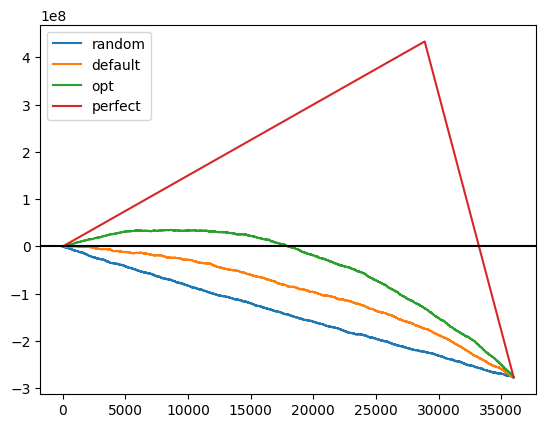

In [55]:
df['profit'].cumsum().plot(label='random')
df.sort_values('pred_default', ascending=False)['profit'].cumsum().reset_index(drop=True).plot(label='default')
df.sort_values('pred_opt', ascending=False)['profit'].cumsum().reset_index(drop=True).plot(label='opt')
df.sort_values('Good_for_loan', ascending=False)['profit'].cumsum().reset_index(drop=True).plot(label='perfect')
plt.axhline(0, color='black')
plt.legend()